# Machine learning model on IRIS DATASET

## Approach to be followed:
   1) Load and audit the data (pandas and numpy)
   
   2) Data preparation and data transformation (pandas , numpy ,sklearn)
   
   3) Data visualization (matplotlib and seaborn)
   
   4) Data analysis(sklearn , scipy)
   
      - univariate (Measures of Central Tendency and measures of Dispersion)
      
      - Bivariate (correlation)
      
      - multivariate ( supervised learning - Classification )

- since the data is labelled with 150 flowers it is classified as supervised problem
- there are 3 different classes of flowers that is why it is a classification problem 
- we have one method under classification problem and that is logistic regression.

## Importing all standard libraries  

In [1]:
import numpy as np # For calculation purposes 
import pandas as pd 
import matplotlib.pyplot as plt # for viz
import seaborn as sns # for viz
from sklearn.linear_model import LogisticRegression # to do logistic regression we need these modules
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report # to evaluate the model and measure the accuracy of the model
from sklearn.model_selection import train_test_split # to split the data into train and test batches
import warnings

In [2]:
df = pd.read_csv('Iris (1).csv',encoding='latin-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


- we need to do encoding from object to numerical as our model won't recognise object dtype
- clearly this is a structured data

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 6)

In [8]:
df.ndim #Two dimensions , Rows and columns

2

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


- mean and median are almost same for sepal length and sepal width which tells us that the data is almost normally distributed 
- the other two features aren't normally distributed , they are skewed 


In [23]:
df.skew()

/var/folders/4_/1f0tnvbd06d3jcdzbl37xphc0000gn/T/ipykernel_3052/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

- petal length and petal width are -ve skewed or left skewed
- ideal is 0 skewed which is imaginary
- skew varies from -infinity to +infinity
- in normal distribution 95% of the data sits between 2 stds
- high skew/ low skew is >1/<1 which means we can't apply statistical methods to the data
- skew varies from -1 to +1




- box plots gives us outliers

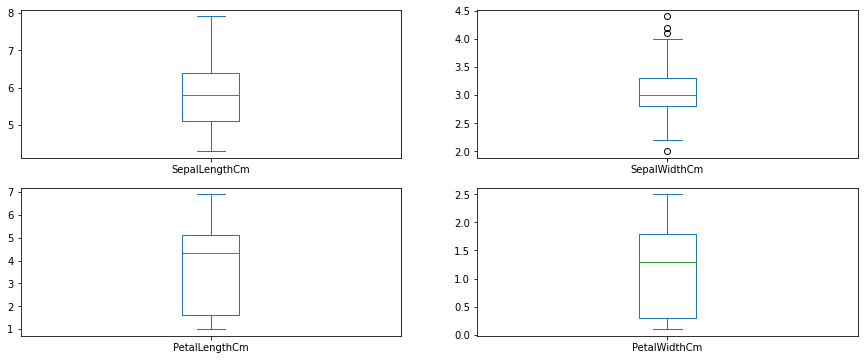

In [41]:
df.plot(kind = 'box',subplots= True , sharex= False , sharey = False  ,layout = (2,2), figsize= (15,6))
plt.show()

- majority of data in petallength and petalwidth lies in the lower section that's why they are exhibiting negative skew. 
- there are few outliers in sepalwidth

In [4]:
df.drop('Id', axis = 1 , inplace = True)

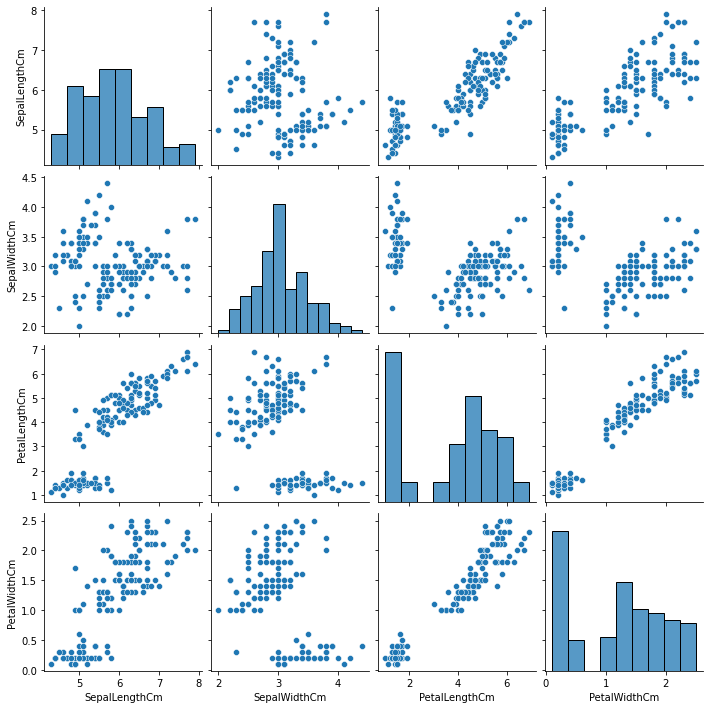

In [38]:
sns.pairplot (df)

- there is a +ve corelation between sepallength and petallength
- ideal threshold is +-0.75
- we can see there is very strong +ve correlation between petallength and petalwidth


In [42]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [49]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:>

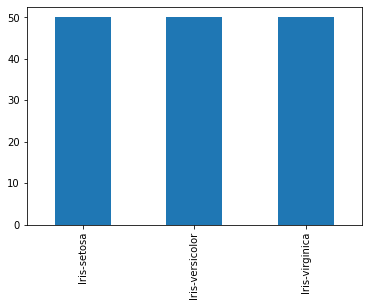

In [48]:
df['Species'].value_counts().plot(kind='bar')

- we need to convert the dtype of species from object to numerical as the sklearn won't take object dtype
- we can do it by labelencoder

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [54]:
df['Species'].dtype# the dtype of species has been changed from object to int

dtype('int64')

In [59]:
le.classes_  # 0 : Iris-setosa', 1 :'Iris-versicolor', 2: 'Iris-virginica'

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

- now we need to divide the data into x and y variables
- x being the independsnt variables
- y being the dependent variable
- we can use iloc function to do so
- MODEL-----> Y=X

In [67]:
X = df.iloc[: , 0:4]
Y = df['Species']
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [71]:
lr = LogisticRegression()


In [72]:
lr.fit(X,Y)

LogisticRegression()

In [73]:
Y_hat=lr.predict(X)

In [74]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [75]:
Y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- Y_hat are the predicted values and  Y are the actual values .
- we can compare Y_hat and Y to know the accuracy of the model

### Evaluation of the model

In [76]:
acc_logistic_regression = accuracy_score(Y,Y_hat)
cm_logistic_regression=confusion_matrix(Y,Y_hat)

In [77]:
print( 'The accuracy score of the model is :',acc_logistic_regression)
print(cm_logistic_regression)

The accuracy score of the model is : 0.9733333333333334
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


- our model is 97.33% accurate
- confusion matrix gives as at which class the model predicted right and at which class model misclassified.
- the diagonal of the matrix gives us the right classifccations 
- as seen in the second row the diagonal matrix says 47 are rightly classified and 3 are misclassified 
- and in the third row only one is misclassifed.